# Sentiment Analysis
0 -  Negative

1 - Postive

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [ ]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [ ]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()
df = pd.read_csv('Restaurant_Reviews.tsv', sep="\t")
df.head(3)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


# Step 2 - Perform basic data quality checks

In [ ]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(4)

In [ ]:
df["Liked"].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Step 3 - Apply preprocessing on X
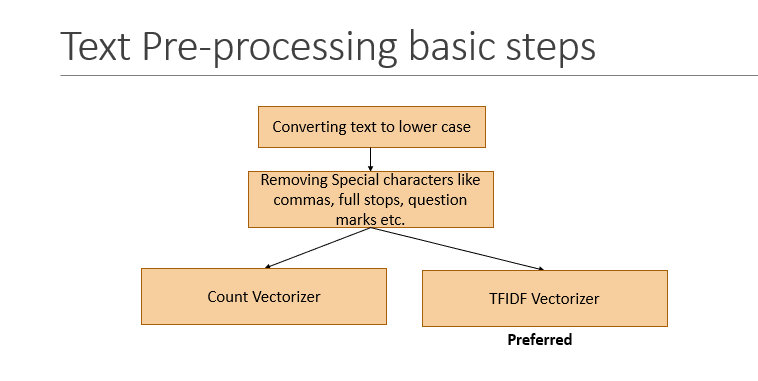

In [ ]:
text = "Wow... Loved this place."
text = text.lower()
print(text)

wow... loved this place.


In [ ]:
import re

In [ ]:
text = re.sub("[^a-z ]", "", text)
text

'wow loved this place'

In [ ]:
import re
def clean_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z ]", "", text)
  return text

In [ ]:
clean_text("Wow... Loved this place.")

'wow loved this place'

In [ ]:
df["cleaned"] = df["Review"].apply(clean_text)

In [ ]:
df.head()

,Review,Liked,cleaned
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# Seperate X and Y(cleaned)

In [ ]:
X = df["cleaned"]
Y = df["Liked"]

In [ ]:
X.head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: cleaned, dtype: object

In [ ]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

# Apply preprocessing on X

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X)

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.","(1

In [ ]:
X_pre = tfidf.transform(X).toarray()
X_pre[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 2046))

In [ ]:
X_pre.shape

(1000, 2046)

# TFIDF -> SVD (Singular Value Decomposition)
LSA - Latent Semantic Analysis

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_pre)

,"n_components n_components: int, default=2Desired dimensionality of output data.If algorithm='arpack', must be strictly less than the number of features.If algorithm='randomized', must be less than or equal to the number of features.The default value is useful for visualisation. For LSA, a value of100 is recommended.",300
,"algorithm algorithm: {'arpack', 'randomized'}, default='randomized'SVD solver to use. Either ""arpack"" for the ARPACK wrapper in SciPy(scipy.sparse.linalg.svds), or ""randomized"" for the randomizedalgorithm due to Halko (2009).",'randomized'
,"n_iter n_iter: int, default=5Number of iterations for randomized SVD solver. Not used by ARPACK. Thedefault is larger than the default in:func:`~sklearn.utils.extmath.randomized_svd` to handle sparsematrices that may have large slowly decaying spectrum.",5
,"n_oversamples n_oversamples: int, default=10Number of oversamples for randomized SVD solver. Not used by ARPACK.See :func:`~sklearn.utils.extmath.randomized_svd` for a completedescription... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD solver.Not used by ARPACK. See :func:`~sklearn.utils.extmath.randomized_svd`for more details... versionadded:: 1.1",'auto'
,"random_state random_state: int, RandomState instance or None, default=NoneUsed during randomized svd. Pass an int for reproducible results acrossmultiple function calls.See :term:`Glossary `.",42
,"tol tol: float, default=0.0Tolerance for ARPACK. 0 means machine precision. Ignored by randomizedSVD solver.",0.0


In [ ]:
X_pre_red = svd.transform(X_pre)
X_pre_red[0:5]

array([[ 1.14618006e-01,  1.90996583e-01,  2.98168712e-01, ...,
         7.31598920e-03,  7.83074387e-02, -6.53175625e-02],
       [ 2.00173430e-01,  6.07188983e-02,  1.03797385e-01, ...,
        -3.10389127e-05, -2.78263911e-02,  8.95524108e-04],
       [ 2.48212086e-01, -5.92449058e-02, -9.23442103e-02, ...,
         4.12000361e-03, -1.85930189e-02,  4.50102592e-02],
       [ 1.04146101e-01, -7.00547403e-03, -1.50216038e-03, ...,
         2.19353053e-02,  5.64119096e-02,  1.73306787e-02],
       [ 4.08330985e-01, -1.90139783e-01, -3.84652860e-02, ...,
        -2.76665813e-02, -2.15917720e-02,  3.11328622e-03]],
      shape=(5, 300))

In [ ]:
X_pre_red.shape

(1000, 300)

# Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [ ]:
xtrain.shape

(800, 300)

In [ ]:
xtest.shape

(200, 300)

# Build the neural network

In [ ]:
X_pre_red.shape[1]

300

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(256, activation="relu", kernel_regularizer=l2(0.02)),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer=l2(0.02)),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,081 (430.00 KB)

 Trainable params: 110,081 (430.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60, callbacks=[es], verbose=False)

# Model evaluation

In [ ]:
train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=False)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

Train Loss : 0.6945
Train Accuracy : 0.5337


In [ ]:
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=False)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

Test Loss : 0.6973
Test Accuracy : 0.5050


# Step 9 - Plot the learning curve

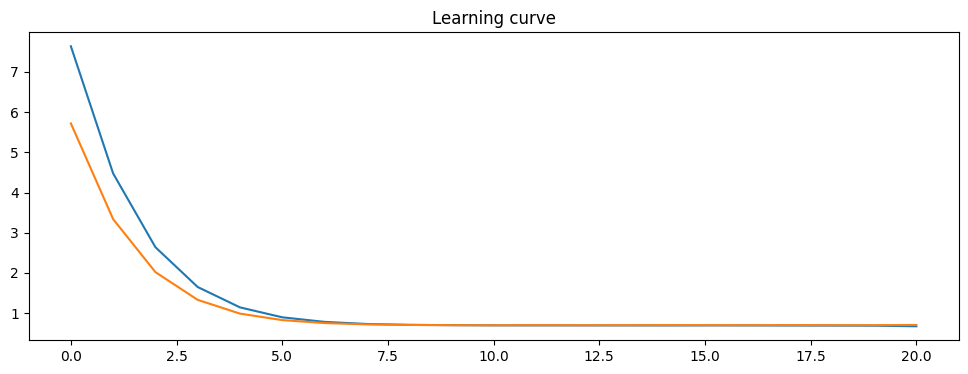

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Valdiation Loss")
plt.title("Learning curve")
plt.show()

# Out of sample prediction

In [ ]:
train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=False)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train accuracy : {train_acc:.4f}")

Train Loss : 0.6945
Train accuracy : 0.5337


In [ ]:
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=False)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test accuracy : {test_acc:.4f}")

Test Loss : 0.6973
Test accuracy : 0.5050


In [ ]:
yprob_train = model.predict(xtrain, verbose=False)
yprob_train[0:5]

array([[0.49109557],
       [0.49313998],
       [0.48875284],
       [0.48699734],
       [0.4988978 ]], dtype=float32)

In [ ]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [ ]:
yprob_test = model.predict(xtest, verbose=False)
yprob_test[0:5]

array([[0.49146107],
       [0.4952694 ],
       [0.4960147 ],
       [0.49505737],
       [0.49212286]], dtype=float32)

In [ ]:
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[0, 0, 0, 0, 0]

In [ ]:
ytest.head()

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

# Out of sample prediction

In [ ]:
tfidf

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.","(1

In [ ]:
svd

,"n_components n_components: int, default=2Desired dimensionality of output data.If algorithm='arpack', must be strictly less than the number of features.If algorithm='randomized', must be less than or equal to the number of features.The default value is useful for visualisation. For LSA, a value of100 is recommended.",300
,"algorithm algorithm: {'arpack', 'randomized'}, default='randomized'SVD solver to use. Either ""arpack"" for the ARPACK wrapper in SciPy(scipy.sparse.linalg.svds), or ""randomized"" for the randomizedalgorithm due to Halko (2009).",'randomized'
,"n_iter n_iter: int, default=5Number of iterations for randomized SVD solver. Not used by ARPACK. Thedefault is larger than the default in:func:`~sklearn.utils.extmath.randomized_svd` to handle sparsematrices that may have large slowly decaying spectrum.",5
,"n_oversamples n_oversamples: int, default=10Number of oversamples for randomized SVD solver. Not used by ARPACK.See :func:`~sklearn.utils.extmath.randomized_svd` for a completedescription... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD solver.Not used by ARPACK. See :func:`~sklearn.utils.extmath.randomized_svd`for more details... versionadded:: 1.1",'auto'
,"random_state random_state: int, RandomState instance or None, default=NoneUsed during randomized svd. Pass an int for reproducible results acrossmultiple function calls.See :term:`Glossary `.",42
,"tol tol: float, default=0.0Tolerance for ARPACK. 0 means machine precision. Ignored by randomizedSVD solver.",0.0


In [ ]:
def predict_sentiment(text: str):
  text = clean_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  prob = model.predict(text_pre_red, verbose=False)
  pred = "Positive" if prob >=0.5 else "Negative"
  return pred, prob

In [ ]:
predict_sentiment("Awesome just liked the taste!...")

('Negative', array([[0.49392992]], dtype=float32))

In [ ]:
predict_sentiment("The service was very slow and i did not like it")

('Negative', array([[0.48737496]], dtype=float32))

In [ ]:
predict_sentiment("The taste of pizza was very good!...")

('Negative', array([[0.49723497]], dtype=float32))

In [ ]:
predict_sentiment("The book i read was really amazing")

('Negative', array([[0.4950213]], dtype=float32))

In [ ]:
predict_sentiment("The movie was really bad and story felt boring")

('Negative', array([[0.49158698]], dtype=float32))

# Save the model object

In [ ]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [ ]:
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [ ]:
model.save("sentiment_model.keras")

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("sentiment_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,245 (1.26 MB)

 Trainable params: 110,081 (430.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,164 (860.02 KB)